<span style="color:blue">DAY-11</span>

<span style="color:red;"><b> "Data Preprocessing Essentials: Train-Test Split, Outlier Handling & Standard Scaling" </b></span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing


In [2]:
data = fetch_california_housing(as_frame=True)
df = data.frame

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
df.info

<bound method DataFrame.info of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       

In [4]:
df.describe

<bound method NDFrame.describe of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

     

In [5]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

<div style="color: purple; font-style: italic;">
  <p><strong>Outliers</strong> are data points that are significantly different from most of the data — either too high or too low.</p>

  <p><strong>What Outliers Do:</strong></p>
  <ul>
    <li><strong>Skew Your Data:</strong> They can distort statistical measures like mean, standard deviation, and correlation.</li>
    <li><strong>Affect Model Performance:</strong>
      <ul>
        <li>In <em>regression</em>, outliers can pull the regression line toward them, worsening predictions.</li>
        <li>In <em>scaling</em>, outliers make StandardScaler inflate/deflate feature values (since it uses mean & std).</li>
        <li>In <em>clustering or distance-based models</em>, outliers can mess up clusters.</li>
      </ul>
    </li>
    <li><strong>Cause Overfitting or Underfitting:</strong> Models may try to learn noise instead of patterns.</li>
  </ul>

  <p><strong>Example:</strong> If your income dataset mostly ranges between <em>20k–80k</em>, but there are few entries like <em>5 million</em>, the mean and scaling will shift, giving wrong impressions of the data distribution.</p>

  <p><strong>What to Do with Outliers:</strong></p>
  <ul>
    <li><strong>Detect them:</strong> Boxplot, Z-Score, IQR</li>
    <li><strong>Handle them:</strong> Remove, Cap (Winsorize), Transform, or Keep based on the case</li>
  </ul>

  <p><strong>Should You Always Remove Outliers?</strong><br>
  ❗ <em>No.</em> It depends on:
    <ul>
      <li>The domain (e.g., fraud detection cares about outliers)</li>
      <li>The model (robust models like tree-based models can handle them better)</li>
    </ul>
  </p>
</div>


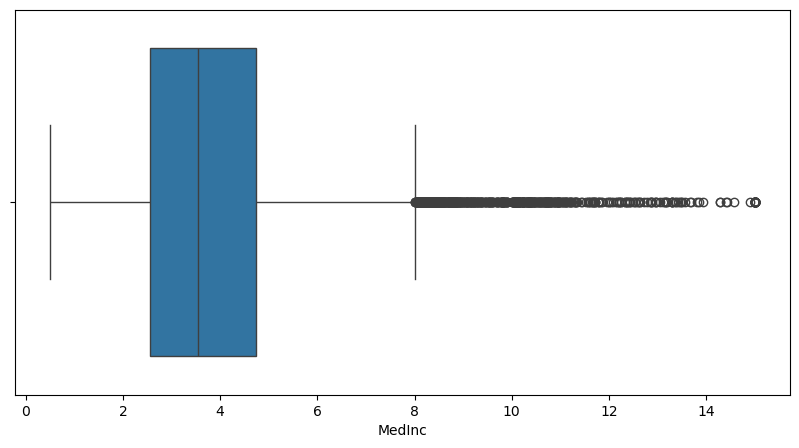

In [7]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['MedInc']) 
plt.show()


<div style="color: purple; font-style: italic;">
  <p><strong>Train-Test Split</strong> is a technique used to divide your dataset into two parts — one for training the model and one for testing it.</p>

  <p><strong>What Train-Test Split Does:</strong></p>
  <ul>
    <li><strong>Prevents Overfitting:</strong> By testing the model on unseen data, it helps ensure the model is not memorizing the training data.</li>
    <li><strong>Evaluates Model Performance:</strong> Provides a realistic check of how well your model will perform on new, unseen data.</li>
    <li><strong>Validates Generalization:</strong> Helps you understand if the model is generalizing patterns or just fitting noise.</li>
  </ul>

  <p><strong>How it Works:</strong></p>
  <ul>
    <li>You split the dataset into <em>Training Set</em> (usually 70–80%) and <em>Test Set</em> (usually 20–30%).</li>
    <li>The model is trained on the Training Set and evaluated on the Test Set.</li>
  </ul>

  <p><strong>Why Not Use the Whole Dataset?</strong>  
  ❗ <em>Because you need unbiased feedback on model performance.</em> If you test on the same data you trained on, the results will be overly optimistic.</p>

  <p><strong>Bonus Tip:</strong> You can also use <em>Validation Sets</em> or <em>Cross-Validation</em> for better evaluation in some cases.</p>
</div>


In [13]:
x = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


<div style="color: purple; font-style: italic;">
  <p><strong>StandardScaler</strong> is a data preprocessing technique used to standardize features by removing the mean and scaling to unit variance.</p>

  <p><strong>What StandardScaler Does:</strong></p>
  <ul>
    <li><strong>Centers the Data:</strong> Subtracts the mean so that each feature has a mean of 0.</li>
    <li><strong>Scales to Unit Variance:</strong> Divides by the standard deviation so that each feature has a standard deviation of 1.</li>
    <li><strong>Makes Features Comparable:</strong> Ensures that features with different scales (like age and income) don't dominate model training.</li>
  </ul>

  <p><strong>Why Use StandardScaler?</strong></p>
  <ul>
    <li>Many algorithms (like Linear Regression, KNN, SVM) perform better when input features are on the same scale.</li>
    <li>Helps with faster convergence and better accuracy in optimization algorithms.</li>
  </ul>

  <p><strong>Important:</strong>  
  ❗ <em>StandardScaler should be fitted on the Training Data only.</em> Then use the same scaler to transform both Training and Test Data to avoid data leakage.</p>

  <p><strong>Does StandardScaler Handle Outliers?</strong>  
  ❗ <em>No.</em> Since it uses mean and standard deviation, it is sensitive to outliers. Consider handling outliers before scaling.</p>
</div>


In [14]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


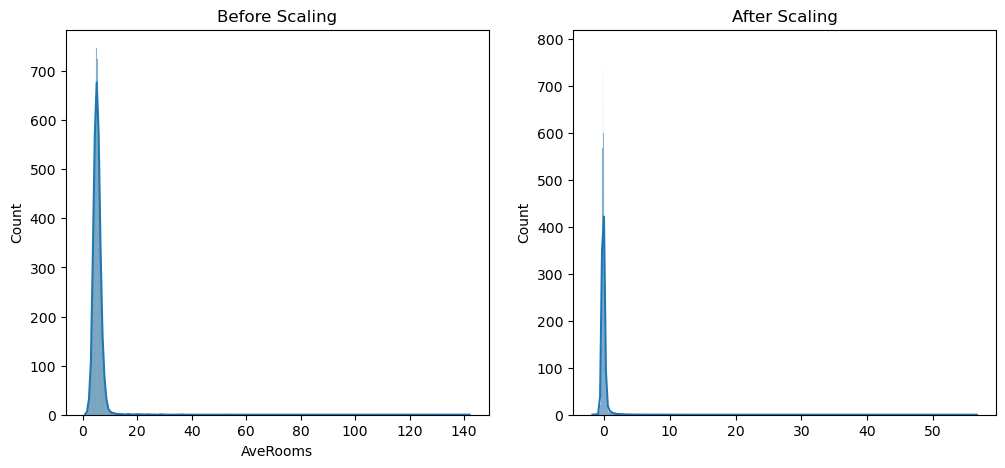

In [17]:
#BEFORE AND AFTER SCALING
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.histplot(x_train['AveRooms'], kde=True)
plt.title("Before Scaling")

plt.subplot(1, 2, 2)
sns.histplot(x_train_scaled[:, 3], kde=True)  # Assuming 'AveRooms' is column 3
plt.title("After Scaling")
plt.show()


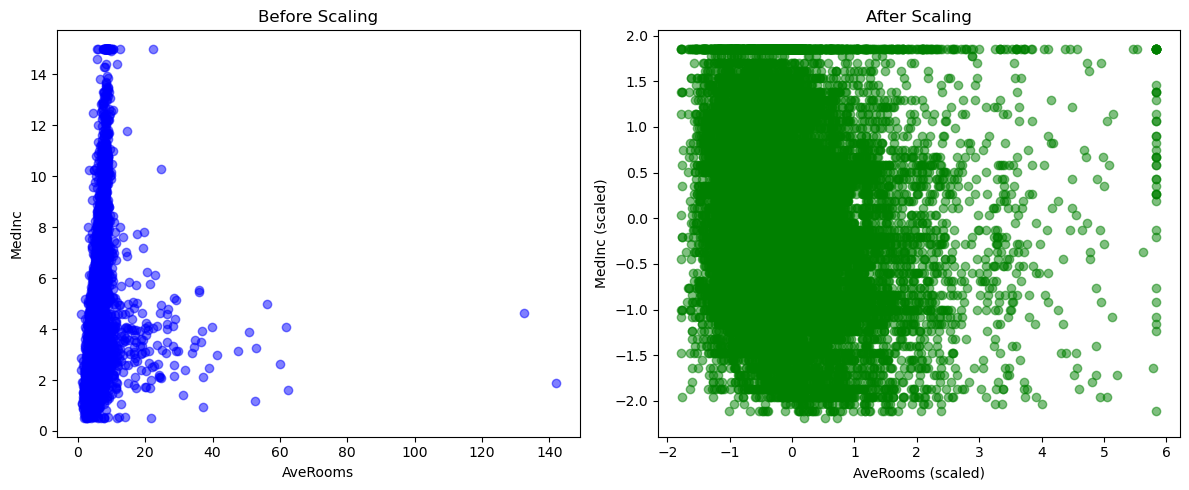

In [21]:


# Scatter plot before scaling
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x['AveRooms'], x['MedInc'], color='blue', alpha=0.5)
plt.title('Before Scaling')
plt.xlabel('AveRooms')
plt.ylabel('MedInc')

# Scatter plot after scaling
plt.subplot(1, 2, 2)
plt.scatter(x_train_scaled[:, 0], x_train_scaled[:, 1], color='green', alpha=0.5)
plt.title('After Scaling')
plt.xlabel('AveRooms (scaled)')
plt.ylabel('MedInc (scaled)')

plt.tight_layout()
plt.show()


<ul>
  <li><span style="color: purple; font-style: italic;"><strong>Before Scaling:</strong> The features have different ranges and units. This imbalance may cause some features to dominate model training, especially in algorithms sensitive to feature magnitudes. The data points are scattered unevenly, and the center is far from the origin (0,0).</span></li>

  <li><span style="color: purple; font-style: italic;"><strong>After Scaling with StandardScaler:</strong> Both features are scaled to have a mean of 0 and a standard deviation of 1. The data points are now centered around the origin (0,0), and the spread across both axes becomes comparable. The overall relationship and pattern among data points remain unchanged.</span></li>
</ul>

<p><span style="color: purple; font-style: italic;"><strong>Final Conclusion:</strong> ❗ <em>StandardScaler standardizes the features for better model performance but does not handle outliers. Always perform outlier detection and treatment before applying scaling to achieve optimal preprocessing results.</em></span></p>
